In [ ]:
import pandas as pd

# Load the spreadsheet
file_path = '/content/EastWestAirlines.xlsx'
spreadsheet = pd.ExcelFile(file_path)

# Display sheet names to understand the structure of the file
spreadsheet.sheet_names

['Description', 'data']

In [ ]:
df = pd.read_excel(file_path, sheet_name='data')

# Display the first few rows of the dataframe to understand its structure
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
missing_values = df.isnull().sum()
missing_values

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

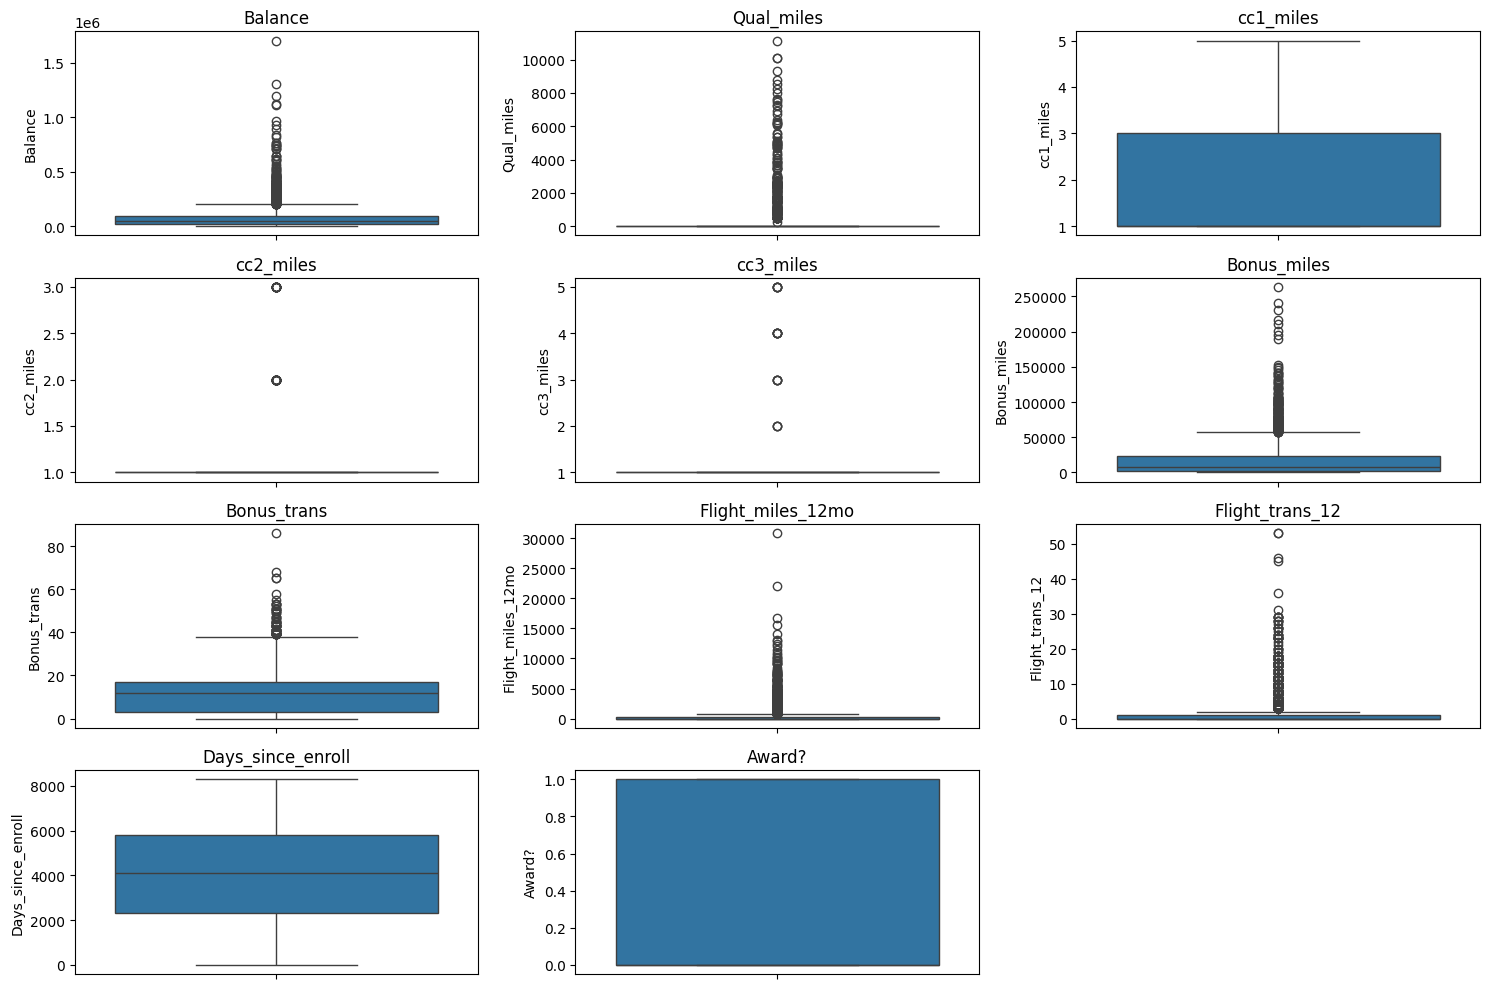

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a box plot for each numerical column
for i, column in enumerate(df.columns[1:], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=['ID#', 'Award?']))
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[1:-1])

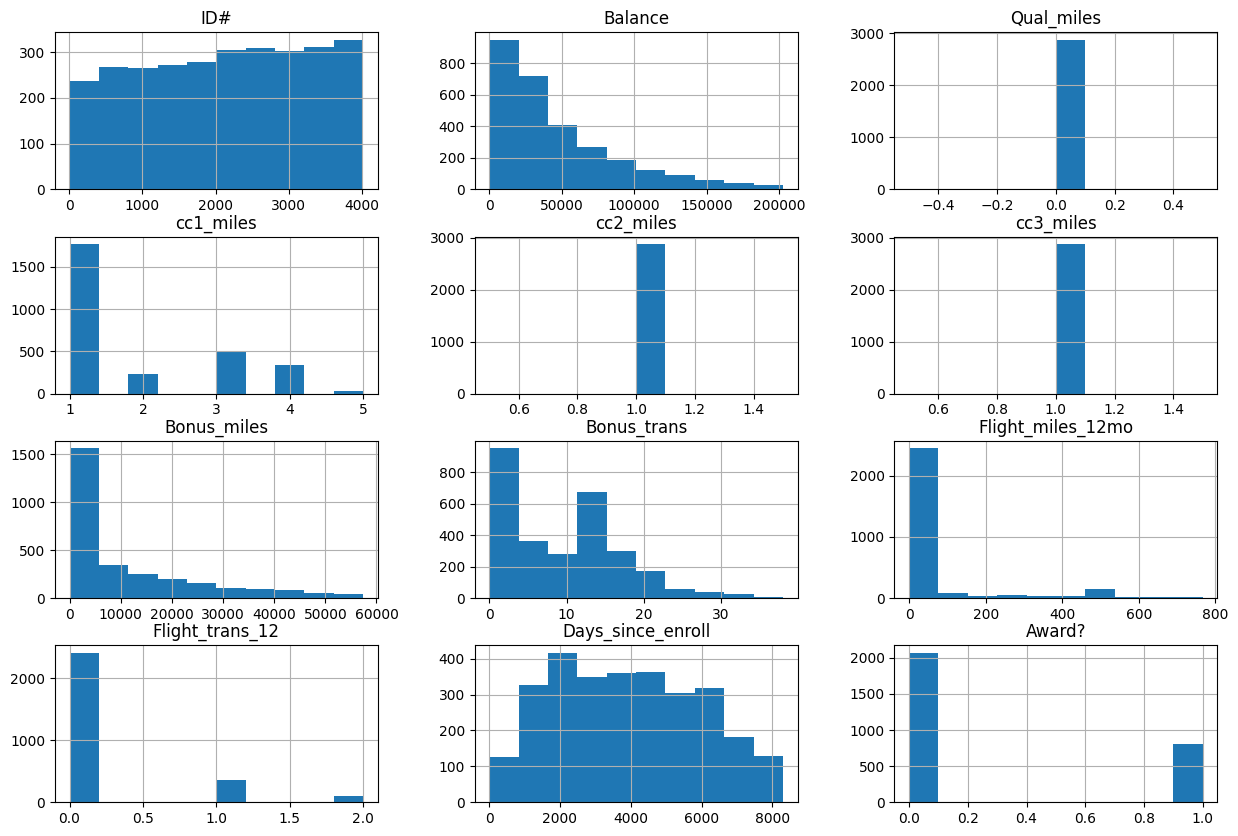

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram
df.hist(figsize=(15, 10))
plt.show()


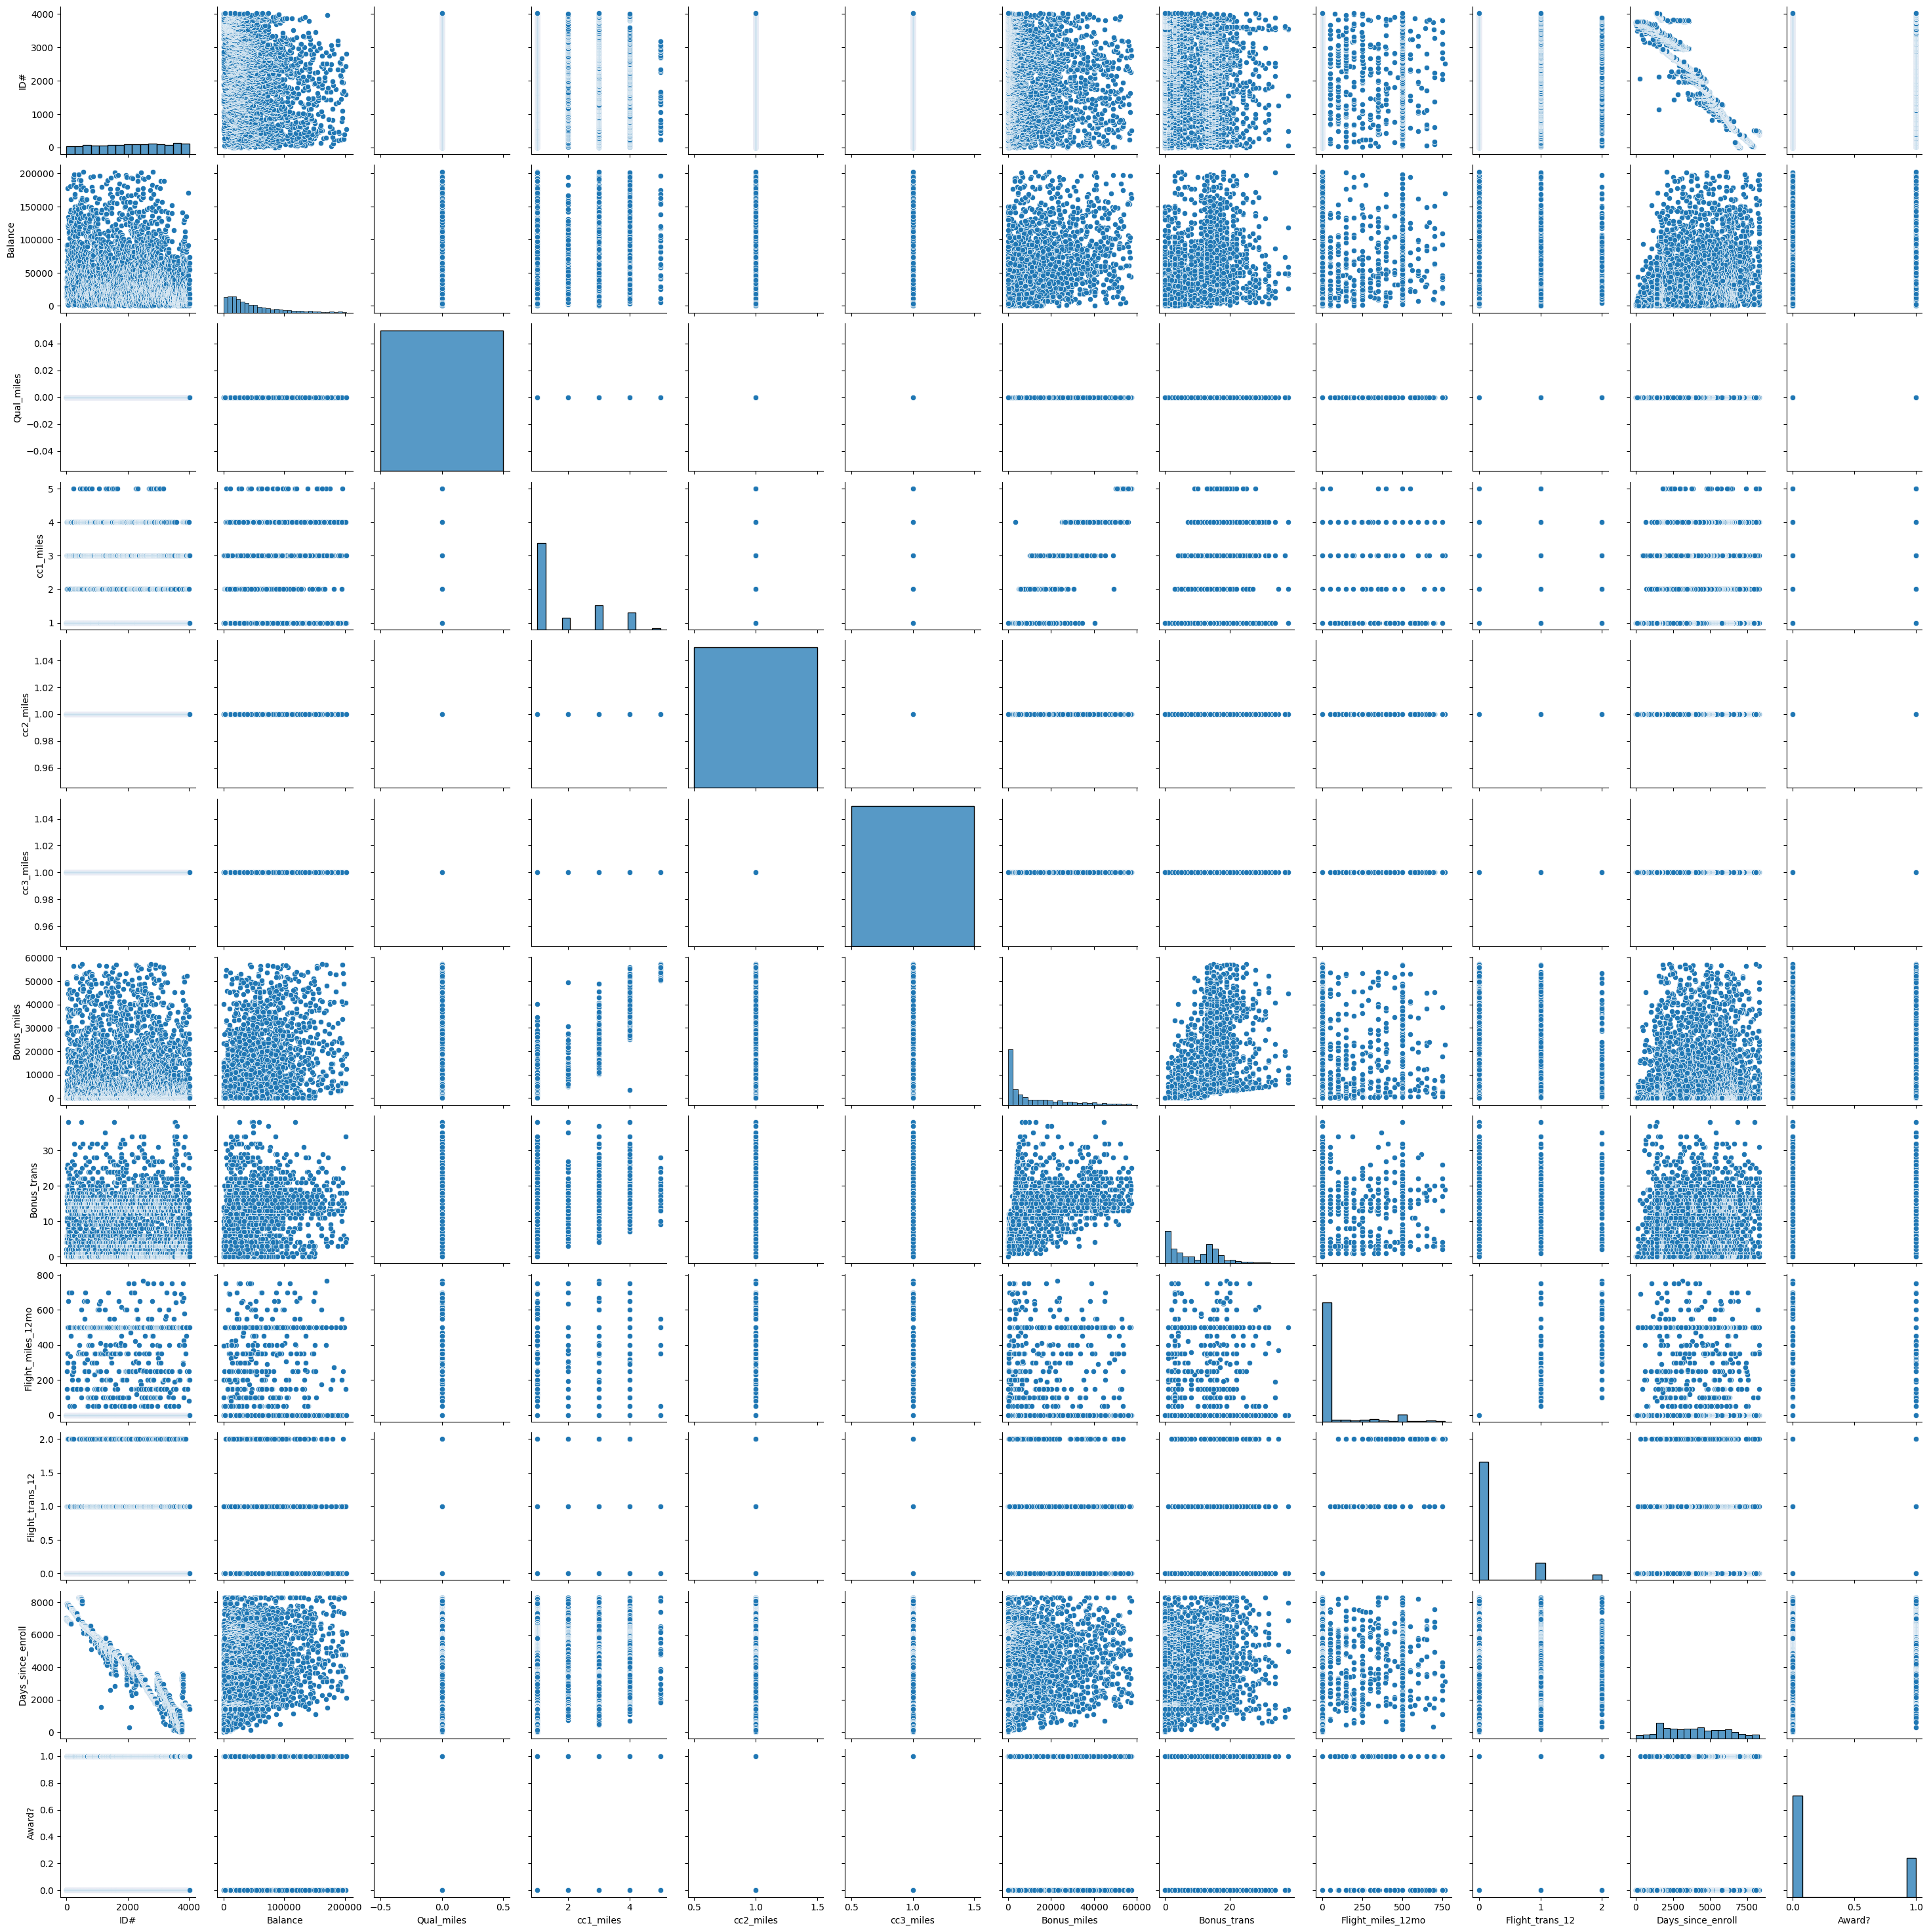

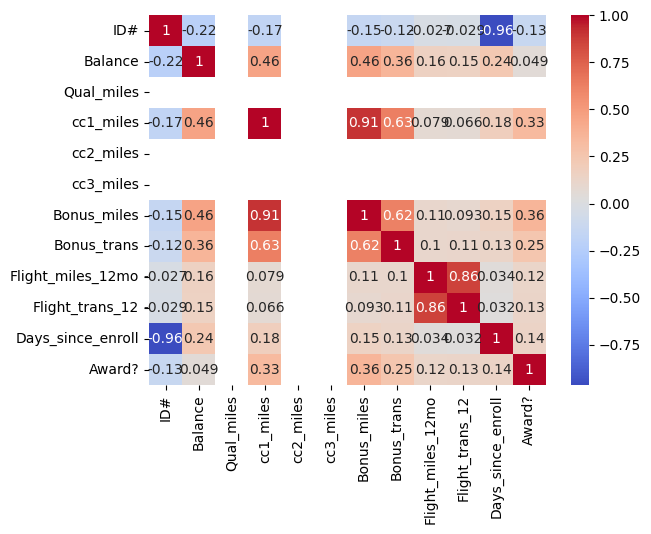

In [ ]:
# Pair plot
sns.pairplot(df)
plt.show()

# Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

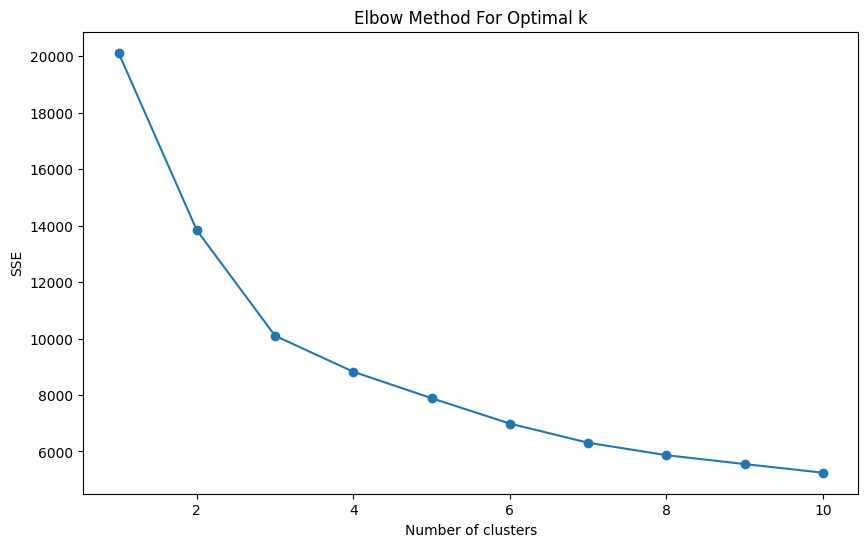

In [ ]:
#K-Means Clustering
def kmeans_clustering(data, max_k=10):
    sse = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), sse, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')
    plt.title('Elbow Method For Optimal k')
    plt.show()

kmeans_clustering(df_scaled)

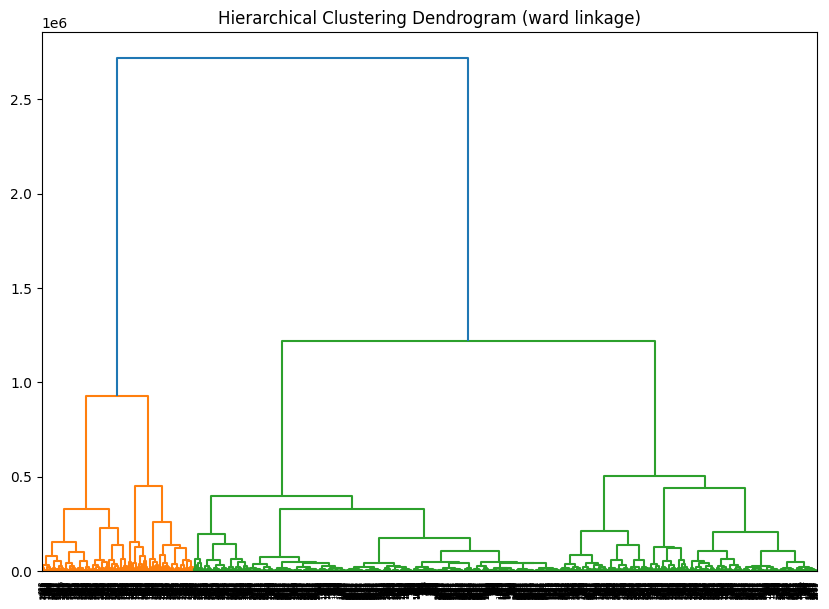

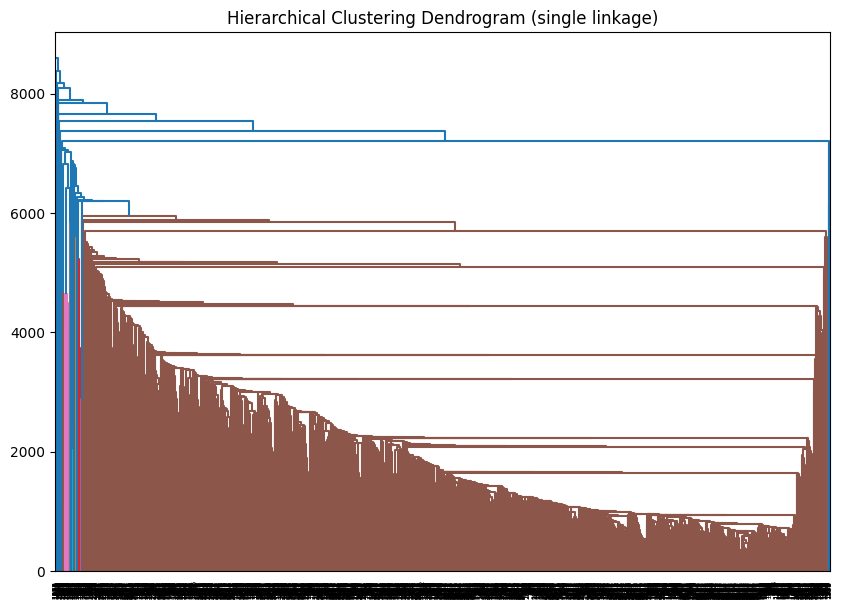

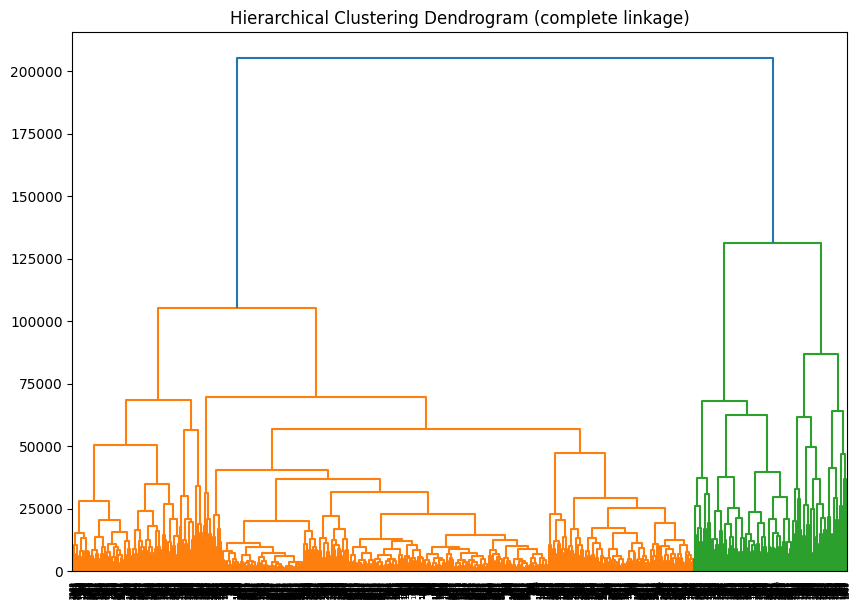

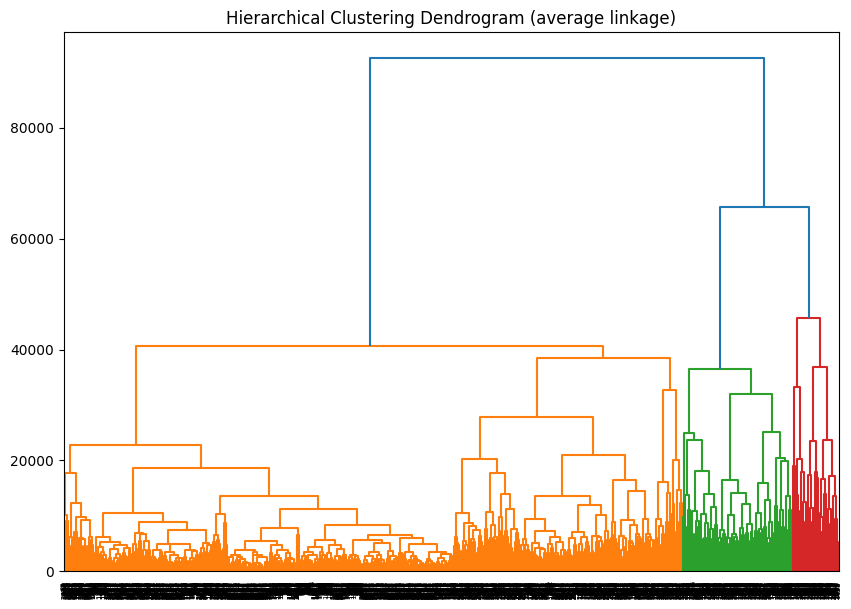

In [ ]:
# Hierarchical Clustering
def hierarchical_clustering(data, method='ward'):
    linked = linkage(df, method=method)
    plt.figure(figsize=(10, 7))
    dendrogram(linked)
    plt.title(f'Hierarchical Clustering Dendrogram ({method} linkage)')
    plt.show()

hierarchical_clustering(df_scaled, method='ward')
hierarchical_clustering(df_scaled, method='single')
hierarchical_clustering(df_scaled, method='complete')
hierarchical_clustering(df_scaled, method='average')



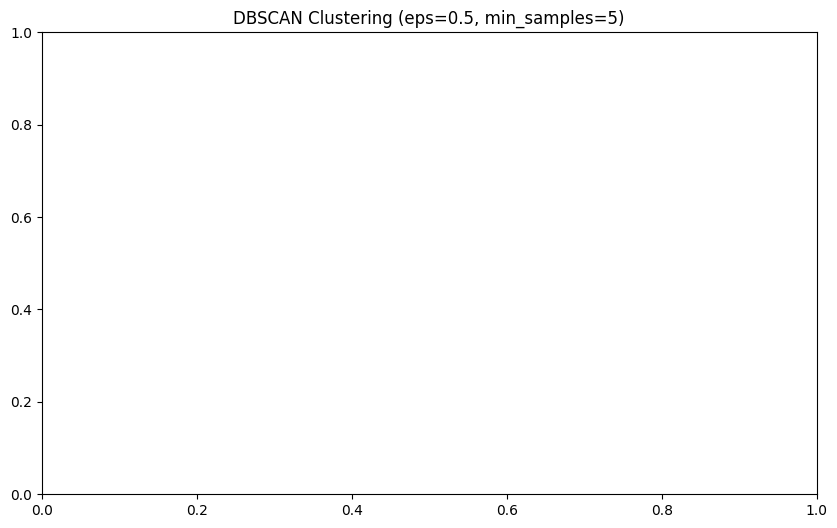

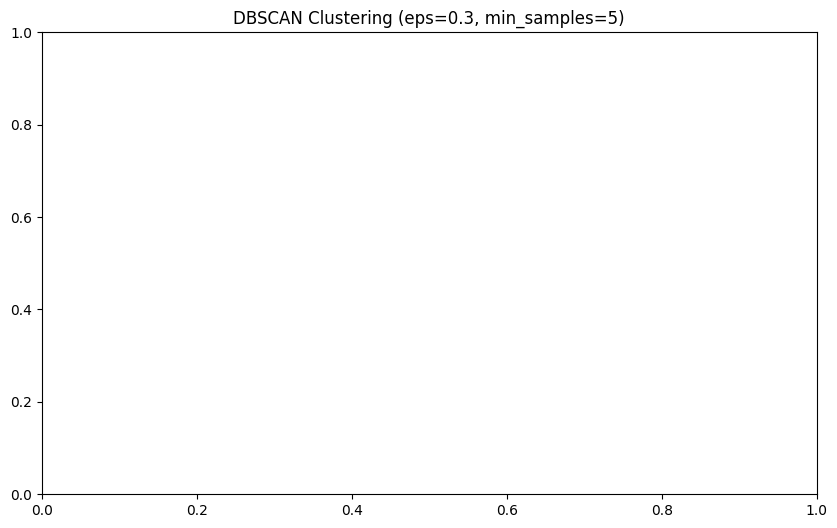

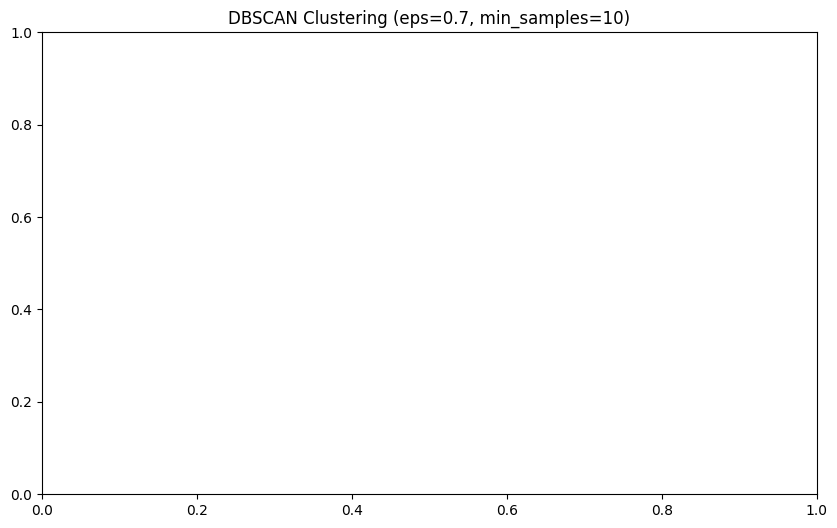

In [35]:
def dbscan_clustering(data, eps=0.5, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data)
    plt.figure(figsize=(10, 6))
    plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
    plt.show()

dbscan_clustering(df_scaled, eps=0.5, min_samples=5)
dbscan_clustering(df_scaled, eps=0.3, min_samples=5)
dbscan_clustering(df_scaled, eps=0.7, min_samples=10)

Based on the elbow graph, the optimal number of clusters
𝑘
k appears to be 3. This is the point where the SSE curve bends ("elbow") and starts to flatten out. Therefore, you should consider using
𝑘
=
3
k=3 for your K-Means clustering as it balances the trade-off between having a low SSE and a reasonable number of clusters.